In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data_2016 = pd.read_csv('Resources/data/train_data_2016.csv')
data_2017 = pd.read_csv('Resources/data/test_data_2017.csv')

In [4]:
data1 = pd.concat([data_2016, data_2017], ignore_index=True)

C:\Users\johna\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
data1.year.value_counts()

2016    241
2017    195
Name: year, dtype: int64

In [6]:
data = pd.get_dummies(data1, columns=['production','rating'], drop_first = True)
data.head()

,box_office,country,genre,runtime,title,year,production_21 Laps Entertainment,production_A Day in the Life Films,production_A24,production_A24 Films,...,production_Wet Paint Production,production_Will Packer Productions,production_Working Title,production_XYZ Films,production_Yale Productions,rating_PG,rating_PG-13,rating_R,rating_TV-MA,rating_Unrated
0,248849,1,3,94,Dean,2016,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,59481553,1,5,103,10 Cloverfield Lane,2016,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,37978162,3,5,144,13 Hours,2016,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5663854,1,2,119,20th Century Women,2016,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,29245,1,1,0,3 Weeks in Yerevan,2016,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [7]:
train = data.loc[data.year == 2016]
test = data.loc[data.year == 2017]

In [8]:
X_train = train[train.columns[~train.columns.isin(['box_office','title', 'year'])]]
y_train = train['box_office'].values.reshape(-1,1)

X_test = test[test.columns[~test.columns.isin(['box_office','title', 'year'])]]
y_test = test['box_office'].values.reshape(-1,1)

In [9]:
print(X_test.shape, y_test.shape)

(195, 199) (195, 1)


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.6194696939899448
Testing Data Score: 0.44307599436561024


Text(0.5, 1.0, 'Residual Plot')

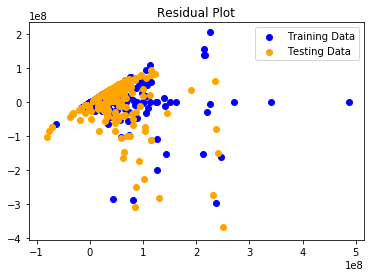

In [13]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")
### END SOLUTION  Out [7]:  Text(0.5,1,'Residual Plot')

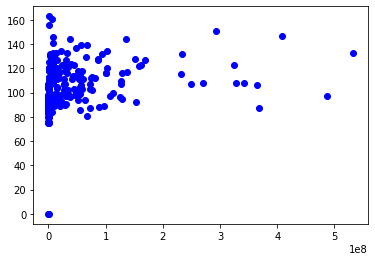

In [14]:
plt.scatter(y_train, X_train['runtime'], c="blue", label="Train Data")

In [15]:
from scipy import stats
import numpy as np

In [16]:
box_office = data['box_office']
runtime = data['runtime']

In [17]:
runtime = runtime.astype(np.float64) 
box_office = box_office.astype(np.float64)

In [18]:
bo_slope, bo_int, bo_r, bo_p, bo_std_err = stats.linregress(
    runtime, box_office)
bo_fit = bo_slope * runtime + bo_int

stats.linregress(runtime, box_office)

LinregressResult(slope=1229000.795341421, intercept=-81474722.97531587, rvalue=0.3018815223084715, pvalue=1.2255023475009007e-10, stderr=186303.52230369207)

Text(0.5, 0, 'Runtime (mins)')

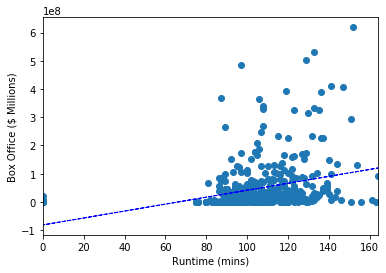

In [19]:
fig, ax = plt.subplots()
ax.set_xlim(min(data['runtime']), max(data['runtime']))
ax.plot(data['runtime'], data['box_office'], linewidth=0, marker="o")
ax.plot(data['runtime'], bo_fit, "b--", linewidth=1)
ax.set_ylabel("Box Office ($ Millions)")
ax.set_xlabel("Runtime (mins)")

In [20]:
box_office = data['box_office']
genre = data['genre']

In [21]:
genre = genre.astype(np.float64) 
box_office = box_office.astype(np.float64)

In [22]:
gn_slope, gn_int, gn_r, gn_p, gn_std_err = stats.linregress(
    genre, box_office)
gn_fit = gn_slope * runtime + gn_int

stats.linregress(genre, box_office)

LinregressResult(slope=18783004.49462893, intercept=-8576971.783309586, rvalue=0.28608990356380276, pvalue=1.1706575559854045e-09, stderr=3019778.5278837783)

Text(0.5, 0, 'Genre (# of categories)')

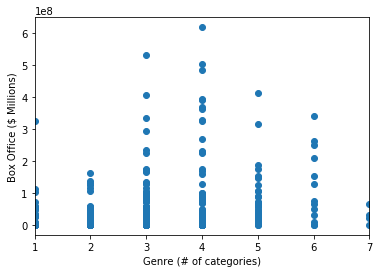

In [37]:
fig1, ax1 = plt.subplots()
ax1.set_xlim(min(data['genre']), max(data['genre']))
ax1.plot(data['genre'], data['box_office'], linewidth=0, marker="o")
# ax1.plot(data['genre'], gn_fit, "r--", linewidth=1)
ax1.set_ylabel("Box Office ($ Millions)")
ax1.set_xlabel("Genre (# of categories)")

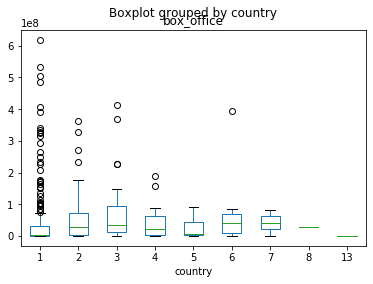

In [24]:
boxplot = data.boxplot(by= 'country', column='box_office', grid=False)


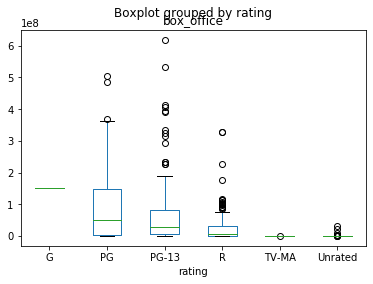

In [25]:
boxplot1 = data1.boxplot(by='rating', column='box_office',grid=False)

In [29]:
data1.production.value_counts()

Warner Bros. Pictures              28
20th Century Fox                   23
Paramount Pictures                 19
Universal Pictures                 17
Walt Disney Pictures               15
Sony Pictures                      14
Open Road Films                    13
Lionsgate                          11
Focus Features                     10
Fox Searchlight Pictures            8
IFC Films                           6
Sony Pictures Classics              6
The Orchard                         6
A24 Films                           5
Amazon Studios                      5
Columbia Pictures                   5
NEON                                5
The Weinstein Company               4
Magnolia Pictures                   4
Summit Entertainment                4
FilmRise                            4
STX Entertainment                   4
Broad Green Pictures                4
DreamWorks Animation                3
Gravitas Ventures                   3
Universal Studios                   3
BH Tilt     

In [33]:
filter_list = ['Warner Bros. Pictures','20th Century Fox','Paramount Pictures','Universal Pictures','Walt Disney Pictures']
data1 = data1[data1.production.isin(filter_list)]
data1

,box_office,country,genre,production,rating,runtime,title,year
2,37978162,3,5,Paramount Pictures,R,144,13 Hours,2016
7,8103139,2,6,20th Century Fox,R,146,A Cure for Wellness,2016
12,77037635,2,3,Walt Disney Pictures,PG,113,Alice Through the Looking Glass,2016
13,40069087,2,5,Paramount Pictures,R,124,Allied,2016
22,54645723,6,3,20th Century Fox,PG-13,115,Assassin's Creed,2016
25,54014580,1,2,Warner Bros. Pictures,PG-13,111,Barbershop: The Next Cut,2016
27,293792936,1,3,Warner Bros. Pictures,PG-13,151,Batman v Superman: Dawn of Justice,2016
30,26384681,1,4,Paramount Pictures,PG-13,123,Ben-Hur,2016
43,408080554,1,3,Walt Disney Pictures,PG-13,147,Captain America: Civil War,2016
46,127380061,2,3,Warner Bros. Pictures,PG-13,107,Central Intelligence,2016


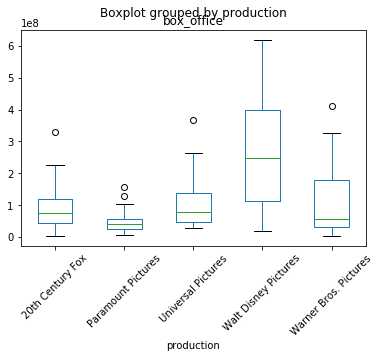

In [38]:
boxplot2 = data1.boxplot(by='production', column='box_office',grid=False, rot=45)